This Python code is discussed during the lecture on plate equations in the course:

Composite and Lightweight Materials (4MM00)

at Eindhoven University of Technology

This code:
(C) Joris Remmers (2013-2023)

## Example 1 (Plate Equations)

A flat, simply supported panel with dimensions $a=400\,$mm and $b=600\,$mm is loaded by a point load with magnitude $F=1200\,$N in point $x_0=150\,$mm and $y_0=350\,$mm. The panel is made of 6 layers of UCHSC200_SE84 UD material (see Canvas for the properties), stacked in the following sequence $\lbrack 0,90,0\rbrack_{\rm S}$

<div>
<img src="plate.jpg" width="600"/>
</div>

Calculate the out-of-plane displacement of the panel. Plot the results as a contourplot.

## Solution

Create the transverse isotropic material model and the laminate. Calculate the D matrix and the D1, D2 and D3 parameters.

In [9]:
from composite    import TransverseIsotropic,Laminate

compUD = TransverseIsotropic( [130e9,7.2e9],0.337,4.2e9,[0.57e-6,35.1e-6],1514.)

print(compUD)

lam = Laminate()

lam.addMaterial( 'UCHSC200_SE84' , compUD )

lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 90 , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 90 , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )

print(lam)

D = lam.getD()

D1 = D[0,0]
D2 = D[1,1]
D3 = D[0,1]+2*D[2,2]

print("D1: ",D1," D2: ",D2," D3: ",D3)


  Elastic Properties:
  -----------------------------------------------------------
  E1     :     1.300e+11 , E2     :     7.200e+09 
  nu12   :          0.34 , G12    :     4.200e+09 
  rho    :       1514.00

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     5.700e-07 , alpha2 :     3.510e-05 

  Laminate properties
  -----------------------------------------------------------
  layer   thick orient.  material
  -----------------------------------------------------------
      0   0.0002      0   UCHSC200_SE84
      1   0.0002     90   UCHSC200_SE84
      2   0.0002      0   UCHSC200_SE84
      3   0.0002      0   UCHSC200_SE84
      4   0.0002     90   UCHSC200_SE84
      5   0.0002      0   UCHSC200_SE84

D1:  14.224941196641147  D2:  5.656915190635289  D3:  1.5612132386157986


Set the dimensions of the problem and the magnitude of the load.

In [10]:
F = -1200

a = 0.4
b = 0.6

x0 = 0.15
y0 = 0.35

Calculate the terms $\mathbb{A}$ and $\mathbb{B}$. We will take the first 5 terms for $m$ and $n$.
$$
\mathbb{B}_{mn}=\frac{4F}{ab}\sin\frac{m\pi x_0}{a}\sin\frac{n\pi y_0}{b}
$$
and
$$
\mathbb{A}_{mn}=\frac{\mathbb{B}_{mn}}{D_1\frac{m^4\pi^4}{a^4}+2D_3\frac{m^2n^2\pi^4}{a^2b^2}+D_2\frac{n^4\pi^4}{b^4}}
$$

In [11]:
import numpy as np
from math import sin,pi

nmax = 6

B = np.zeros((nmax+1,nmax+1))
A = np.zeros((nmax+1,nmax+1))

for m in range(1,nmax):
  for n in range(1,nmax):
    B[m,n] = 4*F*sin(m*pi*x0/a)*sin(n*pi*y0/b)/(a*b)
    A[m,n] = B[m,n]/(pi**4*(D1*(m/a)**4+2*D3*(m/a)**2*(n/b)**2+D2*(n/b)**4))

To construct the contourplot, we generate a meshwith 50 points in both the $x$ and $y$ direction. Then we calculate the outp-of-plane displacement $w$ and load $q$.
$$
w(x,y) = \sum_{m=1}^{5}\sum_{n=1}^{5}\mathbb{A}_{mn}\sin\frac{m\pi x}{a}\sin\frac{n\pi y}{b}\\
$$
and
$$
q(x,y) = \sum_{m=1}^{5}\sum_{n=1}^{5}\mathbb{B}_{mn}\sin\frac{m\pi x}{a}\sin\frac{n\pi y}{b}\\
$$

In [12]:
nplot = 40

xplot = np.linspace(0,a,nplot)
yplot = np.linspace(0,b,nplot)
    
q = np.zeros((nplot,nplot))
w = np.zeros((nplot,nplot))

for i,y in enumerate(yplot):
  for j,x in enumerate(xplot):        
    for m in range(1,nmax+1):
      for n in range(1,nmax+1):
        q[i,j] += B[m,n]*sin(m*pi*x/a)*sin(n*pi*y/b)
        w[i,j] += A[m,n]*sin(m*pi*x/a)*sin(n*pi*y/b)

The load $q$ can be plotted as a 3D surface plot.

<Figure size 432x288 with 0 Axes>

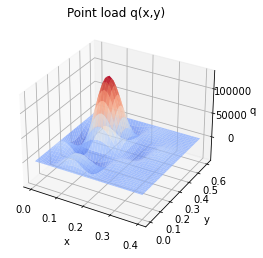

In [13]:
import matplotlib.pyplot as plt
from   matplotlib import cm

fig     = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})               
x, y    = np.meshgrid(xplot,yplot)

plt.title('Point load q(x,y)')
surf = ax.plot_surface(x,y, -q , alpha=0.8, cmap=cm.coolwarm)

#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('q')

plt.show()

Or as a contour plot:

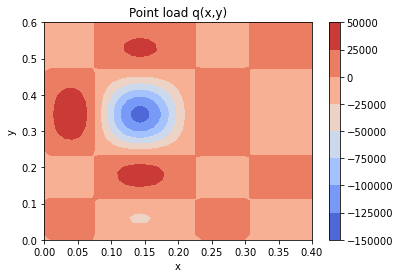

In [14]:
fig, ax = plt.subplots()               

plt.title('Point load q(x,y)')
contourplot = ax.contourf(x,y,q,cmap=cm.coolwarm)

fig.colorbar(contourplot)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

And the out-of-plane displacement.

<Figure size 432x288 with 0 Axes>

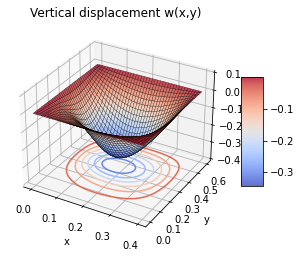

In [15]:
fig     = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})               
x, y    = np.meshgrid(xplot,yplot)

plt.title('Vertical displacement w(x,y)')

surf = ax.plot_surface(x, y, w, alpha=0.8, cmap=cm.coolwarm, linewidth=0.3, edgecolor = 'k')
cset = ax.contour(x, y, w, zdir='z', offset=-0.4, cmap=cm.coolwarm)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
ax.axes.set_zlim3d(bottom=-0.4, top=0.1)

plt.show()